In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
def sample_random_ellipsis(n_points, a, b):
    result = []

    sampled_points = 0
    while sampled_points != n_points:
        x, y = random.uniform(-a, a), random.uniform(-b, b)
        if (x ** 2 / a ** 2) + (y ** 2 / b ** 2) <= 1:
            sampled_points += 1
            result.append([x, y])

    return result

def plot_margins(margins, classes):
    margins = np.array(margins) * classes
    margins = np.sort(margins)

    plt.plot(list(range(len(margins))), margins)
    plt.plot([0, len(margins)], [0, 0], color='black')

    negative_margins = margins[margins < 0]
    plt.fill_between(list(range(len(margins))), 0, margins, color='green')
    plt.fill_between(list(range(len(negative_margins))), 0, negative_margins, color='red')

    plt.title('Margins')
    plt.show()

In [3]:
points_red = sample_random_ellipsis(200, 2, 3)
points_red = np.array(points_red)
points_red += np.array([1, 1])

points_blue = sample_random_ellipsis(200, 2, 2)
points_blue = np.array(points_blue)
points_blue -= np.array([1, 1])

In [4]:
X = np.concatenate([points_blue, points_red])
y = np.squeeze(np.concatenate([np.array([[0] * points_blue.shape[0]]), np.array([[1] * points_blue.shape[0]])], axis=1))
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

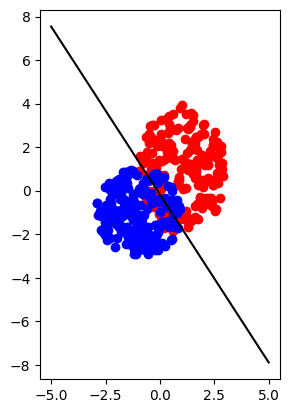

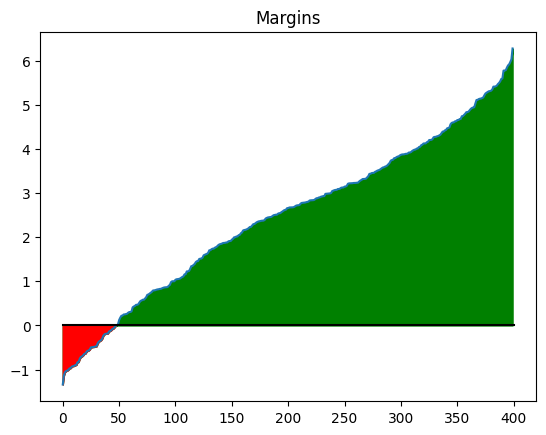

In [5]:
plt.scatter(points_red[:, 0], points_red[:, 1], color = 'red')
plt.scatter(points_blue[:, 0], points_blue[:, 1], color = 'blue')

w = clf.coef_[0]
k = -w[0] / w[1]
b = -(clf.intercept_[0]) / w[1]
xx = np.linspace(-5, 5)
yy = k * xx + b

plt.plot(xx, yy, 'k-')

plt.gca().set_aspect('equal')
plt.show()

margins = clf.decision_function(np.concatenate([points_red, points_blue]))
plot_margins(margins, np.array([1] * points_red.shape[0] + [-1] * points_blue.shape[0]))

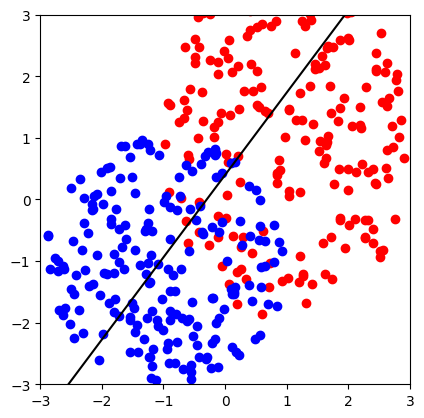

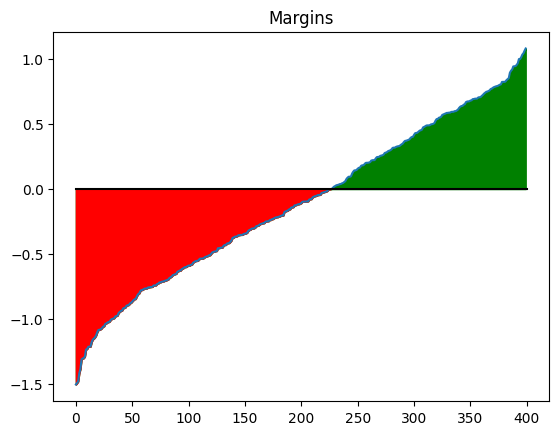

In [32]:
X = np.concatenate([points_blue, points_red])
y = np.random.choice([0, 1], X.shape[0])
clf.fit(X, y)

plt.scatter(points_red[:, 0], points_red[:, 1], color = 'red')
plt.scatter(points_blue[:, 0], points_blue[:, 1], color = 'blue')

w = clf.coef_[0]
k = -w[0] / w[1]
b = -(clf.intercept_[0]) / w[1]
xx = np.linspace(-5, 5)
yy = k * xx + b

plt.plot(xx, yy, 'k-')

plt.gca().set_aspect('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

margins = clf.decision_function(np.concatenate([points_red, points_blue]))
plot_margins(margins, np.array([1] * points_red.shape[0] + [-1] * points_blue.shape[0]))